# Predicción de Riesgo de Evento Cardíaco con Señales de ECG Usando la Base de Datos PTB Diagnostic ECG.

El desafío seleccionado es predecir el riesgo de un evento cardíaco utilizando señales de ECG. Este desafío se centra en el análisis de datos electrocardiográficos (ECG) de la base de datos PTB Diagnostic ECG, donde se desarrollará un modelo predictivo para identificar el riesgo de eventos cardíacos en pacientes con historial de enfermedades cardíacas.

*El procesamiento de los datos es lento debido a la cantidad de datos a utilizar (1,7gb con 549 registros de 290 sujetos), por lo que se sugiere realizar este procesamiento de forma local. Mas información en https://research.google.com/colaboratory/local-runtimes.html*





Los datos fueron extraidos directamente de la pagina Physionet.org y subidas a una carpeta de google drive sin alterar su contenido.

Enlace original: https://physionet.org/content/ptbdb/1.0.0/

## Obtención de Datos



Aqui se realiza la importación de modulo de Google Collab que permite cargar archivos de Google Drive


In [14]:
# from google.colab import drive
# drive.mount('/content/drive')




Selección de ruta de la base de datos



In [1]:
# Ruta a la carpeta compartida en My Drive
# Enlace de la base de datos: https://drive.google.com/drive/folders/1POBJnXe2nfFJK5jtWNa7onvDlyP9ArVJ?usp=sharing
# Se debe agregar a "Mi unidad" para poder utilizar los datos
# Para lo anterior, ubicarse en la carpeta "Compartido conmigo" y arrastrarla hacia el menu de la izquierda y dejarla en la carpeta "Mi unidad". Se creará un acceso directo.
#  recargar la pagina de Google Collab para ver la nueva carpeta agregada


# folder_path = '/content/drive/MyDrive/ptb-diagnostic-ecg-database-1.0.0'      # Ruta en Google Drive
folder_path = './ptb-diagnostic-ecg-database-1.0.0'                             # Ruta local




Aqui se utiliza el archivo RECORDS que contiene todas las referencias de los nombres de los pacientes como tambien de sus archivos asociados

In [2]:
ruta_records = folder_path + '/RECORDS'

# Leer el archivo 'records' para obtener la lista de archivos
with open(ruta_records, 'r') as f:
    registros = f.read().splitlines()

# Ver los registros cargados
print(registros)

['patient001/s0010_re', 'patient001/s0014lre', 'patient001/s0016lre', 'patient002/s0015lre', 'patient003/s0017lre', 'patient004/s0020are', 'patient004/s0020bre', 'patient005/s0021are', 'patient005/s0021bre', 'patient005/s0025lre', 'patient005/s0031lre', 'patient005/s0101lre', 'patient006/s0022lre', 'patient006/s0027lre', 'patient006/s0064lre', 'patient007/s0026lre', 'patient007/s0029lre', 'patient007/s0038lre', 'patient007/s0078lre', 'patient008/s0028lre', 'patient008/s0037lre', 'patient008/s0068lre', 'patient009/s0035_re', 'patient010/s0036lre', 'patient010/s0042lre', 'patient010/s0061lre', 'patient011/s0039lre', 'patient011/s0044lre', 'patient011/s0049lre', 'patient011/s0067lre', 'patient012/s0043lre', 'patient012/s0050lre', 'patient013/s0045lre', 'patient013/s0051lre', 'patient013/s0072lre', 'patient014/s0046lre', 'patient014/s0056lre', 'patient014/s0071lre', 'patient015/s0047lre', 'patient015/s0057lre', 'patient015/s0152lre', 'patient016/s0052lre', 'patient016/s0060lre', 'patient01

Aqui se hace la carga de todos los datos.




In [3]:
# %pip install wfdb
import wfdb
import os

# Ruta base donde están las carpetas de los pacientes
ruta_base_datos = folder_path

# Lista para almacenar todos los registros cargados
todos_los_registros = []

# Iterar sobre los registros del archivo 'records'
for registro in registros:
    try:
        # Construir la ruta completa para el archivo
        record_path = os.path.join(ruta_base_datos, registro)

        # Cargar el archivo
        record = wfdb.rdrecord(record_path)

        # Agregar el registro cargado a la lista
        todos_los_registros.append(record)

        print(f"Cargado: {record_path}")

    except Exception as e:
        print(f"Error cargando {record_path}: {e}")

print(f"Total de registros cargados: {len(todos_los_registros)}")

Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient001/s0010_re
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient001/s0014lre
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient001/s0016lre
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient002/s0015lre
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient003/s0017lre
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient004/s0020are
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient004/s0020bre
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient005/s0021are
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient005/s0021bre
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient005/s0025lre
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient005/s0031lre
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient005/s0101lre
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient006/s0022lre
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient006/s0027lre
Cargado: ./ptb-diagnostic-ecg-database-1.0.0/patient006/s0064lre
Cargado: ./ptb-diagnostic

In [4]:
# Search for missing values
import numpy as np

# Buscar valores perdidos
for record in todos_los_registros:
    # Obtener la señal
    signal = record.p_signal

    # Calcular la cantidad de valores perdidos
    missing_values = np.isnan(signal).sum()

    # Mostrar la cantidad de valores perdidos
    print(f"Registro {record.record_name} tiene {missing_values} valores perdidos")


Registro s0010_re tiene 0 valores perdidos
Registro s0014lre tiene 0 valores perdidos
Registro s0016lre tiene 0 valores perdidos
Registro s0015lre tiene 0 valores perdidos
Registro s0017lre tiene 0 valores perdidos
Registro s0020are tiene 0 valores perdidos
Registro s0020bre tiene 0 valores perdidos
Registro s0021are tiene 0 valores perdidos
Registro s0021bre tiene 0 valores perdidos
Registro s0025lre tiene 0 valores perdidos
Registro s0031lre tiene 0 valores perdidos
Registro s0101lre tiene 0 valores perdidos
Registro s0022lre tiene 0 valores perdidos
Registro s0027lre tiene 0 valores perdidos
Registro s0064lre tiene 0 valores perdidos
Registro s0026lre tiene 0 valores perdidos
Registro s0029lre tiene 0 valores perdidos
Registro s0038lre tiene 0 valores perdidos
Registro s0078lre tiene 0 valores perdidos
Registro s0028lre tiene 0 valores perdidos
Registro s0037lre tiene 0 valores perdidos
Registro s0068lre tiene 0 valores perdidos
Registro s0035_re tiene 0 valores perdidos
Registro s0

: 

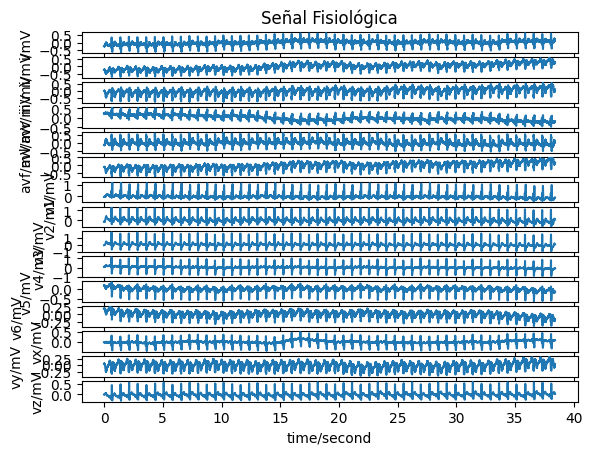

In [19]:
# Graficar las señales de un registro

wfdb.plot_wfdb(record=todos_los_registros[0], title='Señal Fisiológica')




### Mostrando la información de los comentarios de un paciente

In [20]:
# Mostrar los comentarios de un registro
record = todos_los_registros[0]
# Mostrar los comentarios de un registro de forma legible
for comment in record.comments:
    print(f"- {comment}")


- age: 81
- sex: female
- ECG date: 01/10/1990
- Diagnose:
- Reason for admission: Myocardial infarction
- Acute infarction (localization): infero-latera
- Former infarction (localization): no
- Additional diagnoses: Diabetes mellitus
- Smoker: no
- Number of coronary vessels involved: 1
- Infarction date (acute): 29-Sep-90
- Previous infarction (1) date: n/a
- Previous infarction (2) date: n/a
- Hemodynamics:
- Catheterization date: 16-Oct-90
- Ventriculography: Akinesia inferior wall
- Chest X-ray: Heart size upper limit of norm
- Peripheral blood Pressure (syst/diast):  140/80 mmHg
- Pulmonary artery pressure (at rest) (syst/diast): n/a
- Pulmonary artery pressure (at rest) (mean): n/a
- Pulmonary capillary wedge pressure (at rest): n/a
- Cardiac output (at rest): n/a
- Cardiac index (at rest): n/a
- Stroke volume index (at rest): n/a
- Pulmonary artery pressure (laod) (syst/diast): n/a
- Pulmonary artery pressure (laod) (mean): n/a
- Pulmonary capillary wedge pressure (load): n/a
-

### Mostrando los valores únicos en el atributo 'Reason for admission'

In [21]:
reason_of_admission_unicos = []

for record in todos_los_registros:
    reason = record.comments[4].split(':')[1].strip()
    # Agregar a la lista de reason_of_admission_unicos si no está presente
    if reason not in reason_of_admission_unicos:
        reason_of_admission_unicos.append(reason)

print('Valores Unicos de la razón de admisión:')
for reason in reason_of_admission_unicos:
    print(f"- {reason}")

Valores Unicos de la razón de admisión:
- Myocardial infarction
- Healthy control
- Valvular heart disease
- Dysrhythmia
- Heart failure (NYHA 2)
- Heart failure (NYHA 3)
- n/a
- Heart failure (NYHA 4)
- Palpitation
- Cardiomyopathy
- Stable angina
- Hypertrophy
- Bundle branch block
- Unstable angina
- Myocarditis


### Eliminando de la lista los valores n/a

In [22]:
print("n° registros previo eliminación de n/a: ", len(todos_los_registros))

registros_sin_NA = []

for record in todos_los_registros:
    reason = record.comments[4].split(':')[1].strip()
    # Agregar a la lista de reason_of_admission_unicos si no está presente
    if reason != 'n/a':
        registros_sin_NA.append(record)

todos_los_registros = registros_sin_NA

print("n° registros post eliminación de n/a: ", len(todos_los_registros))

n° registros previo eliminación de n/a:  549
n° registros post eliminación de n/a:  522


### Mostrando nuevamente los valores únicos en el atributo 'Reason for admission'

agregar el porque


In [23]:
reason_of_admission_unicos = []

for record in todos_los_registros:
    reason = record.comments[4].split(':')[1].strip()
    # Agregar a la lista de reason_of_admission_unicos si no está presente
    if reason not in reason_of_admission_unicos:
        reason_of_admission_unicos.append(reason)

print('Valores Unicos de la razón de admisión:')
for reason in reason_of_admission_unicos:
    print(f"- {reason}")

Valores Unicos de la razón de admisión:
- Myocardial infarction
- Healthy control
- Valvular heart disease
- Dysrhythmia
- Heart failure (NYHA 2)
- Heart failure (NYHA 3)
- Heart failure (NYHA 4)
- Palpitation
- Cardiomyopathy
- Stable angina
- Hypertrophy
- Bundle branch block
- Unstable angina
- Myocarditis


### Cantidad de muestras con la razón de admision de Infarto al Miocardio

In [24]:
# Guardando los infartos al miocardio en una lista
infartos_Miocardio = []
for record in todos_los_registros:
    # Verificar si en la lista comments exista Reason for admission: Myocardial infarction
    if 'Reason for admission: Myocardial infarction' in record.comments:
       infartos_Miocardio.append(record)

print("Cantidad de muestras con infartos al miocardio: "+str(len(infartos_Miocardio)))

Cantidad de muestras con infartos al miocardio: 368


En este codigo se imprime información de un paciente cargado en el programa

In [25]:
# Mostrar información de uno de los registros cargados
if todos_los_registros:
    print(f"Primer registro cargado: {todos_los_registros[0].__dict__}")

# Número total de registros cargados
print(f"Total de registros cargados correctamente: {len(todos_los_registros)}")

Primer registro cargado: {'record_name': 's0010_re', 'n_sig': 15, 'fs': 1000, 'counter_freq': None, 'base_counter': None, 'sig_len': 38400, 'base_time': None, 'base_date': None, 'comments': ['age: 81', 'sex: female', 'ECG date: 01/10/1990', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): infero-latera', 'Former infarction (localization): no', 'Additional diagnoses: Diabetes mellitus', 'Smoker: no', 'Number of coronary vessels involved: 1', 'Infarction date (acute): 29-Sep-90', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 16-Oct-90', 'Ventriculography: Akinesia inferior wall', 'Chest X-ray: Heart size upper limit of norm', 'Peripheral blood Pressure (syst/diast):  140/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output (at rest): n/a', 'Card

## Visualización de datos en crudo

Visualización de los primeros 5 registros

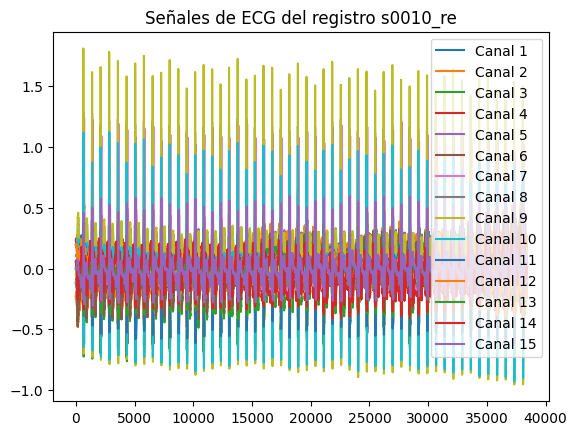

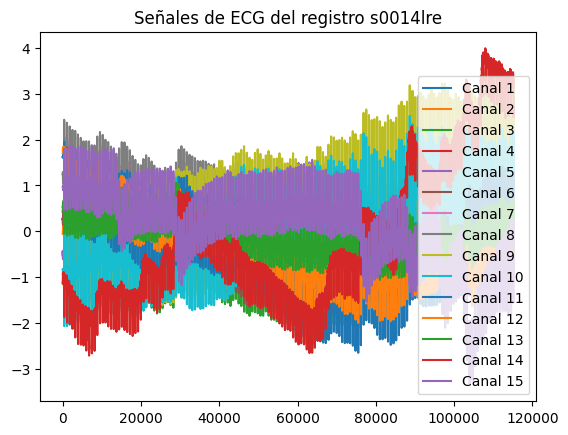

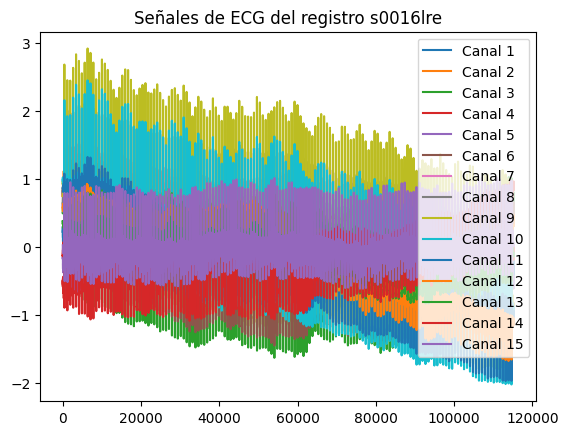

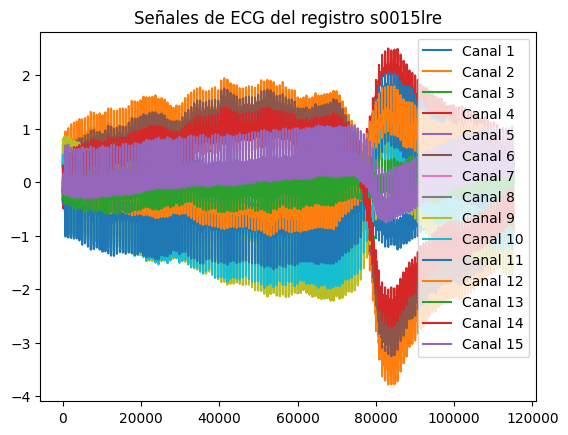

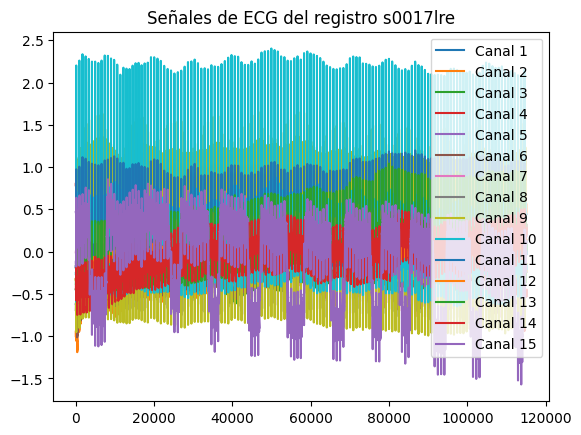

In [26]:
import matplotlib.pyplot as plt

# Visualizar algunas señales
for record in todos_los_registros[:5]:
    plt.figure()
    for i in range(len(record.sig_name)):
        plt.plot(record.p_signal[:, i], label=f'Canal {i+1}')
    plt.title(f'Señales de ECG del registro {record.record_name}')
    plt.legend()
    plt.show()